In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('avocado.csv')
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
data.shape

(18249, 14)

In [4]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


### Let's check for null values

In [5]:
data.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

#### Checking for values which has 0 values

In [6]:
for column_name in data.columns:
    column = data[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Unnamed: 0  is :  432
Count of zeros in column  Date  is :  0
Count of zeros in column  AveragePrice  is :  0
Count of zeros in column  Total Volume  is :  0
Count of zeros in column  4046  is :  242
Count of zeros in column  4225  is :  61
Count of zeros in column  4770  is :  5497
Count of zeros in column  Total Bags  is :  15
Count of zeros in column  Small Bags  is :  159
Count of zeros in column  Large Bags  is :  2370
Count of zeros in column  XLarge Bags  is :  12048
Count of zeros in column  type  is :  0
Count of zeros in column  year  is :  0
Count of zeros in column  region  is :  0


#### Checking the datatypes of columns

In [7]:
data.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

### Dropping the unnamed column

In [8]:
data=data.drop(columns=['Unnamed: 0'])

### let's deal with the columns which have 0 values

In [9]:
data['Total Bags']=data['Total Bags'].replace(0.0,data['Total Bags'].mean())

In [10]:
data['Small Bags']=data['Small Bags'].replace(0.0,data['Small Bags'].mean())


In [11]:
data['Large Bags']=data['Large Bags'].replace(0.0,data['Large Bags'].mean())

In [12]:
data['4046']=data['4046'].replace(0.0,data['4046'].mean())

In [13]:
data['4225']=data['4225'].replace(0.0,data['4225'].mean())

In [14]:
data['4770']=data['4770'].replace(0.0,data['4770'].mean())

 Xlarge bags has 70 % of data 0 so we are not replacing it

### Visualization of the Categorical columns

conventional    9126
organic         9123
Name: type, dtype: int64


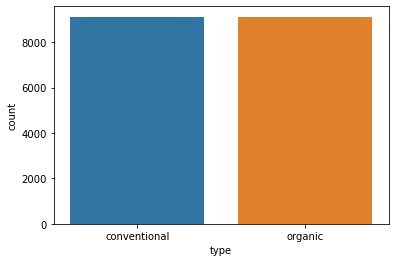

In [15]:
ax=sns.countplot(x='type',data=data)
print(data['type'].value_counts())

HartfordSpringfield    338
Plains                 338
Columbus               338
SouthCarolina          338
GreatLakes             338
Denver                 338
RaleighGreensboro      338
Jacksonville           338
Northeast              338
Midsouth               338
West                   338
PhoenixTucson          338
Roanoke                338
Sacramento             338
NorthernNewEngland     338
LosAngeles             338
SanDiego               338
Orlando                338
Southeast              338
Charlotte              338
CincinnatiDayton       338
NewYork                338
BaltimoreWashington    338
Seattle                338
Nashville              338
Albany                 338
California             338
HarrisburgScranton     338
Tampa                  338
GrandRapids            338
DallasFtWorth          338
LasVegas               338
BuffaloRochester       338
RichmondNorfolk        338
Pittsburgh             338
TotalUS                338
Indianapolis           338
P

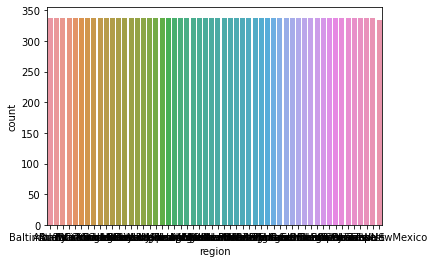

In [16]:
ax=sns.countplot(x='region',data=data)
print(data['region'].value_counts())

#### Checking the Distribution of the Continuous data

In [17]:
df_continuous=data.drop(columns=['type','region','Date'])

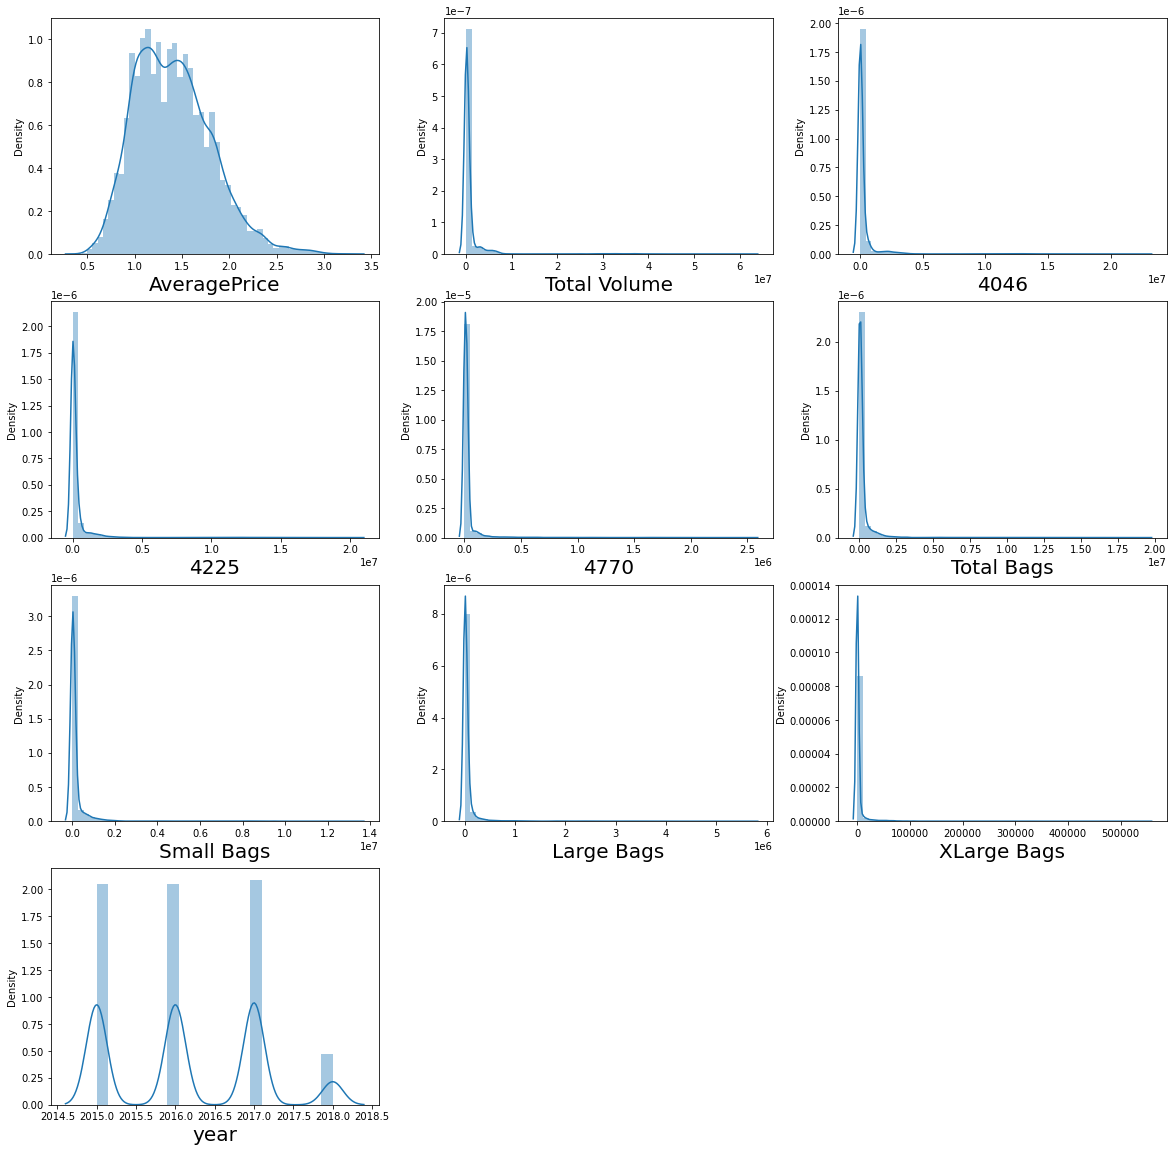

In [18]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df_continuous:
    if plotnumber<=25:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df_continuous[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Encoding of the Dataset

In [19]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [20]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.160000,8696.87,8603.62,93.25,0.0,0,2015,0
1,50,1.35,54876.98,674.28,44638.81,58.330000,9505.56,9408.07,97.49,0.0,0,2015,0
2,49,0.93,118220.22,794.70,109149.67,130.500000,8145.35,8042.21,103.14,0.0,0,2015,0
3,48,1.08,78992.15,1132.00,71976.41,72.580000,5811.16,5677.40,133.76,0.0,0,2015,0
4,47,1.28,51039.60,941.48,43838.39,75.780000,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161,1.63,17074.83,2046.96,1529.20,22839.735993,13498.67,13066.82,431.85,0.0,1,2018,53
18245,160,1.71,13888.04,1191.70,3431.50,22839.735993,9264.84,8940.04,324.80,0.0,1,2018,53
18246,159,1.87,13766.76,1191.92,2452.79,727.940000,9394.11,9351.80,42.31,0.0,1,2018,53
18247,158,1.93,16205.22,1527.63,2981.04,727.010000,10969.54,10919.54,50.00,0.0,1,2018,53


### Checking the correlation

In [21]:
data.corr()['region']

Date           -0.000101
AveragePrice   -0.011716
Total Volume    0.174176
4046            0.192410
4225            0.145953
4770            0.085718
Total Bags      0.175447
Small Bags      0.165930
Large Bags      0.196301
XLarge Bags     0.082281
type           -0.000280
year           -0.000055
region          1.000000
Name: region, dtype: float64

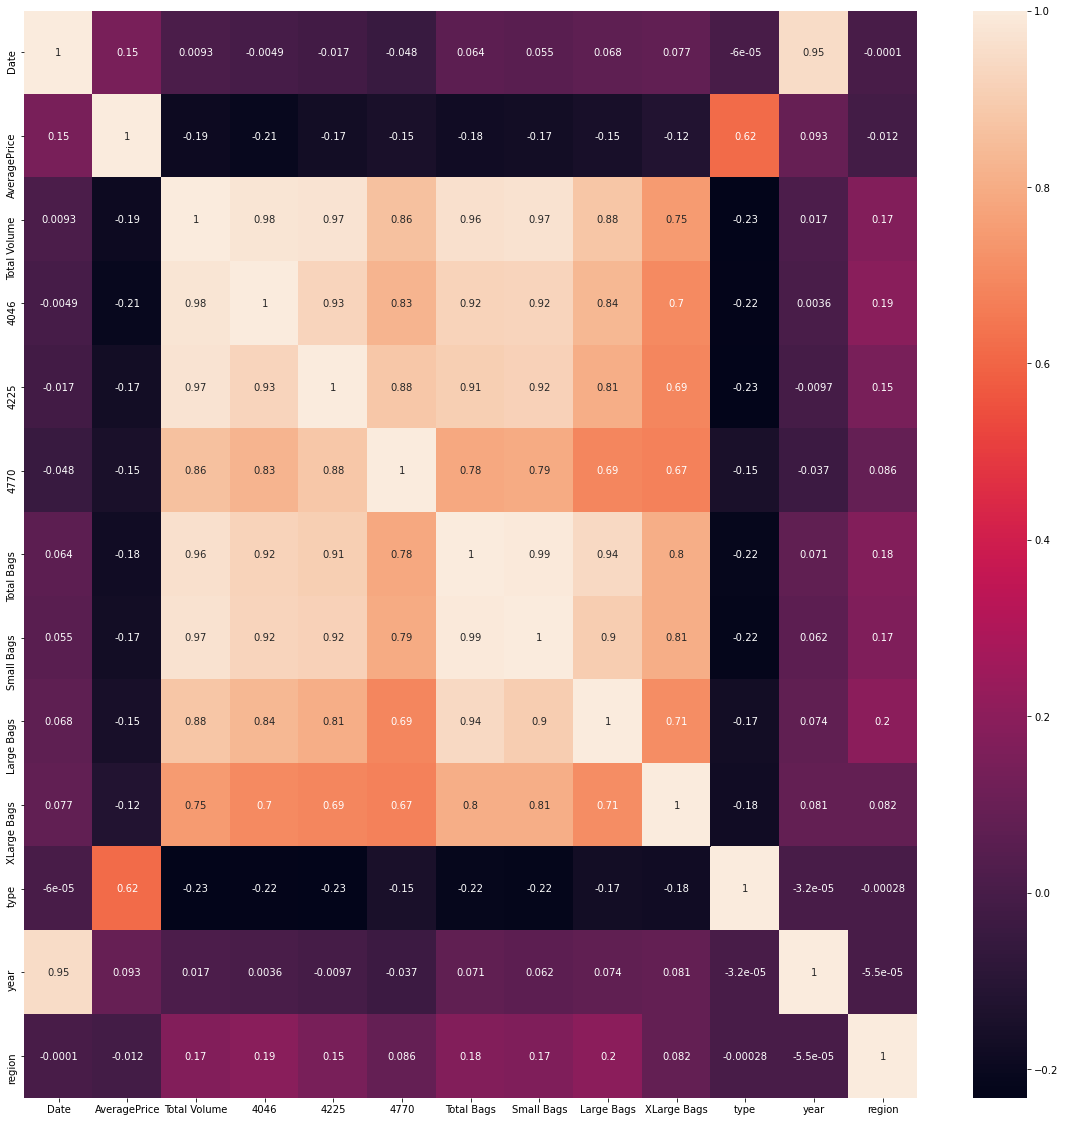

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

#### Dropping the columns which has less relationship with target variables

In [23]:
data_new=data.drop(columns=['Date','AveragePrice','type','year'])

In [24]:
data_new

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,64236.62,1036.74,54454.85,48.160000,8696.87,8603.62,93.25,0.0,0
1,54876.98,674.28,44638.81,58.330000,9505.56,9408.07,97.49,0.0,0
2,118220.22,794.70,109149.67,130.500000,8145.35,8042.21,103.14,0.0,0
3,78992.15,1132.00,71976.41,72.580000,5811.16,5677.40,133.76,0.0,0
4,51039.60,941.48,43838.39,75.780000,6183.95,5986.26,197.69,0.0,0
...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,22839.735993,13498.67,13066.82,431.85,0.0,53
18245,13888.04,1191.70,3431.50,22839.735993,9264.84,8940.04,324.80,0.0,53
18246,13766.76,1191.92,2452.79,727.940000,9394.11,9351.80,42.31,0.0,53
18247,16205.22,1527.63,2981.04,727.010000,10969.54,10919.54,50.00,0.0,53


### Checking for outliers using boxplot

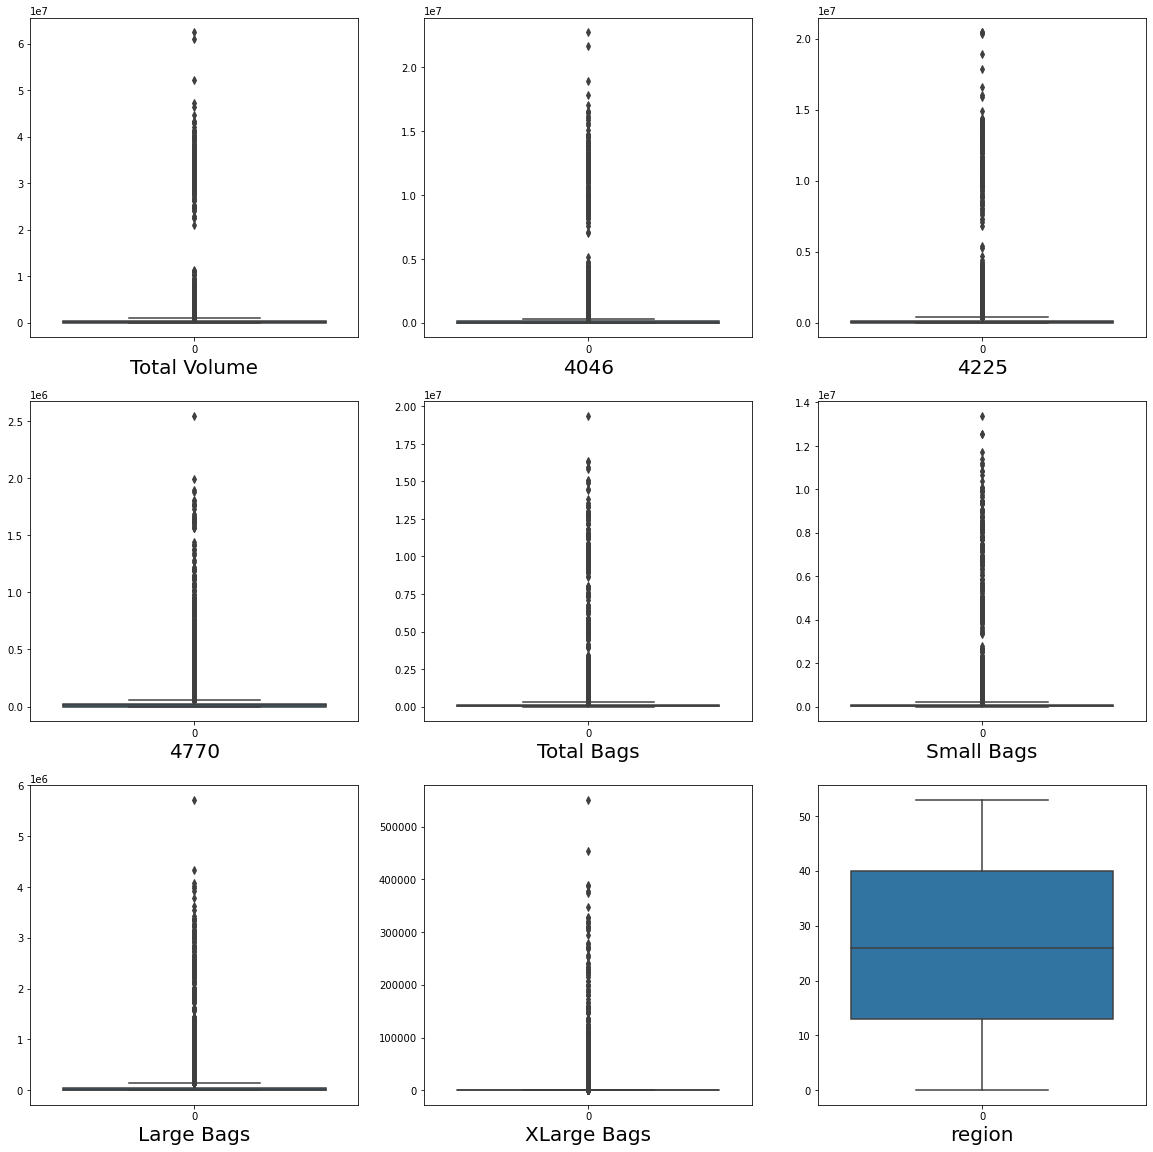

In [25]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in data_new:
    if plotnumber<=20:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data=data_new[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Taking 'region' as Target variable

### Dividing the Dataset into dependent and independent variable

In [26]:
x=data_new.drop(columns='region')
y=data_new['region']

### Checking Skewness

In [27]:
x.skew().sort_values()

4046             8.648526
4225             8.942760
Total Volume     9.007687
Small Bags       9.541906
Total Bags       9.756195
Large Bags       9.818731
4770            10.244212
XLarge Bags     13.139751
dtype: float64

### Transform data to remove skewness

In [28]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

### Scaling the data

In [29]:
sc=StandardScaler()
x_new=sc.fit_transform(x_new)
x_new

array([[-0.08660524, -0.71815646,  0.30467555, ..., -0.36198099,
        -1.35782954, -0.69984934],
       [-0.15574567, -0.84291942,  0.22855162, ..., -0.32592033,
        -1.34654313, -0.69984934],
       [ 0.17932662, -0.79546331,  0.57784205, ..., -0.38910317,
        -1.33217115, -0.69984934],
       ...,
       [-0.77150535, -0.67734111, -0.79005391, ..., -0.3283453 ,
        -1.55000378, -0.69984934],
       [-0.69807719, -0.60428883, -0.72672687, ..., -0.26547405,
        -1.51072759, -0.69984934],
       [-0.66380937, -0.41352391, -0.80302029, ..., -0.22737653,
        -1.66025156, -0.69984934]])

### Checking Multicolinearity using VIF(variance inflation factor)

In [30]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_new,i)for i in range(x_new.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,30.459159,Total Volume
1,4.239880,4046
2,7.768531,4225
3,1.098427,4770
4,15.139365,Total Bags
5,7.873993,Small Bags
6,1.419649,Large Bags
7,1.832450,XLarge Bags


In [31]:
x=data_new.drop(columns=['Total Bags','Small Bags'])  # due to multicolinearity exist

In [32]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

In [33]:
sc=StandardScaler()
x_new=sc.fit_transform(x_new)
x_new

array([[-0.08660524, -0.71815646,  0.30467555, ..., -1.35782954,
        -0.69984934, -2.01155231],
       [-0.15574567, -0.84291942,  0.22855162, ..., -1.34654313,
        -0.69984934, -2.01155231],
       [ 0.17932662, -0.79546331,  0.57784205, ..., -1.33217115,
        -0.69984934, -2.01155231],
       ...,
       [-0.77150535, -0.67734111, -0.79005391, ..., -1.55000378,
        -0.69984934,  1.54383806],
       [-0.69807719, -0.60428883, -0.72672687, ..., -1.51072759,
        -0.69984934,  1.54383806],
       [-0.66380937, -0.41352391, -0.80302029, ..., -1.66025156,
        -0.69984934,  1.54383806]])

In [34]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_new,i)for i in range(x_new.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,12.215651,Total Volume
1,4.219430,4046
2,6.738821,4225
3,1.097627,4770
4,1.344878,Large Bags
5,1.817912,XLarge Bags
6,1.086072,region


### Finding the best random state

In [ ]:
maxAccu=0 #maximum accuracy
maxRS=0  # best random state value for which max accuracy is achieved
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Max Accuracy is',maxAccu,'on Random State ',maxRS)

### Splitting data Into Training and test data

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=36)

### Logistic Regression

In [37]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

58.09774271312733
[[1 1 2 ... 1 3 0]
 [3 3 0 ... 3 2 0]
 [0 2 1 ... 0 2 3]
 ...
 [2 3 0 ... 1 2 1]
 [0 2 2 ... 1 0 0]
 [2 2 1 ... 2 3 1]]
              precision    recall  f1-score   support

           0       0.01      0.01      0.01        76
           1       0.03      0.03      0.03        91
           2       0.01      0.01      0.01        87
           3       0.04      0.03      0.04        86
           4       0.02      0.03      0.02        78
           5       0.05      0.03      0.04        87
           6       0.00      0.00      0.00        68
           7       0.02      0.01      0.01        86
           8       0.03      0.03      0.03        93
           9       0.01      0.01      0.01        84
          10       0.03      0.03      0.03        91
          11       0.03      0.02      0.02        86
          12       0.01      0.01      0.01        85
          13       0.01      0.01      0.01        91
          14       0.00      0.00      0.00        

### Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
pred=DT.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  100.0
[[76  0  0 ...  0  0  0]
 [ 0 91  0 ...  0  0  0]
 [ 0  0 87 ...  0  0  0]
 ...
 [ 0  0  0 ... 81  0  0]
 [ 0  0  0 ...  0 83  0]
 [ 0  0  0 ...  0  0 92]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00        87
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        78
           5       1.00      1.00      1.00        87
           6       1.00      1.00      1.00        68
           7       1.00      1.00      1.00        86
           8       1.00      1.00      1.00        93
           9       1.00      1.00      1.00        84
          10       1.00      1.00      1.00        91
          11       1.00      1.00      1.00        86
          12       1.00      1.00      1.00        85
          13       1.00      1.00      1.00        91
          14     

### Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  99.47403024326101
[[76  0  0 ...  0  0  0]
 [ 0 91  0 ...  0  0  0]
 [ 0  0 87 ...  0  0  0]
 ...
 [ 0  0  0 ... 81  0  0]
 [ 0  0  0 ...  0 83  0]
 [ 0  0  0 ...  0  0 92]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00        87
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        78
           5       1.00      1.00      1.00        87
           6       1.00      1.00      1.00        68
           7       1.00      1.00      1.00        86
           8       1.00      1.00      1.00        93
           9       1.00      1.00      1.00        84
          10       0.99      1.00      0.99        91
          11       1.00      0.99      0.99        86
          12       0.96      1.00      0.98        85
          13       1.00      0.98      0.99        91
     

### SVC

In [41]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  92.85557747096209
[[76  0  0 ...  0  0  0]
 [ 0 91  0 ...  0  0  0]
 [ 0  0 87 ...  0  0  0]
 ...
 [ 0  0  0 ... 81  0  0]
 [ 0  0  0 ...  1 82  0]
 [ 0  0  0 ...  3  0 84]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        91
           2       0.99      1.00      0.99        87
           3       0.98      1.00      0.99        86
           4       0.97      0.99      0.98        78
           5       1.00      0.90      0.95        87
           6       0.97      0.93      0.95        68
           7       0.93      1.00      0.97        86
           8       0.99      0.99      0.99        93
           9       0.95      0.95      0.95        84
          10       0.97      0.98      0.97        91
          11       0.99      0.99      0.99        86
          12       0.98      0.99      0.98        85
          13       1.00      0.97      0.98        91
     

Decision tree ,Random Forest and SVC are producing good accuracy. Now we will check for cross validation score as well for overfitting

### Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score

In [44]:
cvs_LR=cross_val_score(LR,x_new,y,cv=5)
print("Cross Validation score for Logistic Regresiion is ",cvs_LR.mean())

Cross Validation score for Logistic Regresiion is  0.43930831866114567


In [45]:
cvs_DT=cross_val_score(DT,x_new,y,cv=5)
print("Cross validation score for Decision tree is ",cvs_DT.mean())

Cross validation score for Decision tree is  1.0


In [46]:
cvs_RF=cross_val_score(RF,x_new,y,cv=5)
print("Cross validation score for Random Forest is ",cvs_RF.mean())

Cross validation score for Random Forest is  0.9659124023470496


In [47]:
cvs_SVC=cross_val_score(svc,x_new,y,cv=5)
print("Cross validation score for SVC is ",cvs_SVC.mean())

Cross validation score for SVC is  0.8261779057501212


Random Forest is Performing better among all so we will choose  Random forest classifier as our final model

#### Saving the model

In [50]:
import pickle
filename='Avocado_classi.pickle'
pickle.dump(RF,open(filename,'wb'))

# Taking 'Average price' as Target variable

### Checking the correlation

In [51]:
data.corr()['AveragePrice']

Date            0.145514
AveragePrice    1.000000
Total Volume   -0.192752
4046           -0.206687
4225           -0.172693
4770           -0.146752
Total Bags     -0.176847
Small Bags     -0.173151
Large Bags     -0.154010
XLarge Bags    -0.117592
type            0.615845
year            0.093197
region         -0.011716
Name: AveragePrice, dtype: float64

Dropping columns which have less relation with target variable

In [52]:
data_new=data.drop(columns=['year','region'])

### Dividing the Dataset into dependent and independent variable

In [53]:
x=data_new.drop(columns='AveragePrice')
y=data_new['AveragePrice']

### Checking Skewness

In [54]:
x.skew().sort_values()

Date             0.000117
type             0.000329
4046             8.648526
4225             8.942760
Total Volume     9.007687
Small Bags       9.541906
Total Bags       9.756195
Large Bags       9.818731
4770            10.244212
XLarge Bags     13.139751
dtype: float64

### Transform data to remove skewness

In [55]:
x_new=power_transform(x)

### Scaling the data

In [56]:
sc=StandardScaler()
x_new=sc.fit_transform(x_new)
x_new

array([[-0.58305373, -0.08660524, -0.71815646, ..., -1.35782954,
        -0.69984934, -0.99983562],
       [-0.60532524, -0.15574567, -0.84291942, ..., -1.34654313,
        -0.69984934, -0.99983562],
       [-0.62772182,  0.17932662, -0.79546331, ..., -1.33217115,
        -0.69984934, -0.99983562],
       ...,
       [ 1.40879579, -0.77150535, -0.67734111, ..., -1.55000378,
        -0.69984934,  1.00016441],
       [ 1.39266926, -0.69807719, -0.60428883, ..., -1.51072759,
        -0.69984934,  1.00016441],
       [ 1.37651374, -0.66380937, -0.41352391, ..., -1.66025156,
        -0.69984934,  1.00016441]])

### Checking Multicolinearity using VIF(variance inflation factor)

In [57]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_new,i)for i in range(x_new.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.301155,Date
1,33.219372,Total Volume
2,4.284886,4046
3,7.839084,4225
4,1.149378,4770
5,16.985726,Total Bags
6,7.895673,Small Bags
7,1.440955,Large Bags
8,2.222009,XLarge Bags
9,3.398676,type


In [58]:
x=data_new.drop(columns=['Total Bags'])  # due to multicolinearity exist

In [59]:
x_new=power_transform(x)

In [60]:
sc=StandardScaler()
x_new=sc.fit_transform(x_new)
x_new

array([[-0.58305373, -0.08624822, -0.08660524, ..., -1.35782954,
        -0.69984934, -0.99983562],
       [-0.60532524, -0.03402196, -0.15574567, ..., -1.34654313,
        -0.69984934, -0.99983562],
       [-0.62772182, -1.27393796,  0.17932662, ..., -1.33217115,
        -0.69984934, -0.99983562],
       ...,
       [ 1.40879579,  1.14779044, -0.77150535, ..., -1.55000378,
        -0.69984934,  1.00016441],
       [ 1.39266926,  1.2658763 , -0.69807719, ..., -1.51072759,
        -0.69984934,  1.00016441],
       [ 1.37651374,  0.61828746, -0.66380937, ..., -1.66025156,
        -0.69984934,  1.00016441]])

In [61]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_new,i)for i in range(x_new.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.242819,Date
1,2.047734,AveragePrice
2,23.792451,Total Volume
3,4.170980,4046
4,8.186755,4225
5,1.179186,4770
6,5.823441,Small Bags
7,1.364139,Large Bags
8,2.221142,XLarge Bags
9,3.747404,type


### Finding the best random state

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
Lr=LinearRegression()

In [71]:
maxAccu=0
maxRS=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=i)
    Lr.fit(x_train,y_train)
    y_pred=Lr.predict(x_test)
    accu=r2_score(y_test,y_pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRs=i
print('Max accuracy is ',maxAccu,'on random state',maxRs)
    

Max accuracy is  0.9818892754192721 on random state 120


### Splitting data Into Training and test data

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=120)

In [75]:
Lr.fit(x_train,y_train)
y_pred=Lr.predict(x_test)
print(r2_score(y_test,y_pred))

0.9818892754192721


### Cross Validation

In [76]:
cv_score=cross_val_score(Lr,x_new,y,cv=4)
print(cv_score.mean())

0.9425494596501909


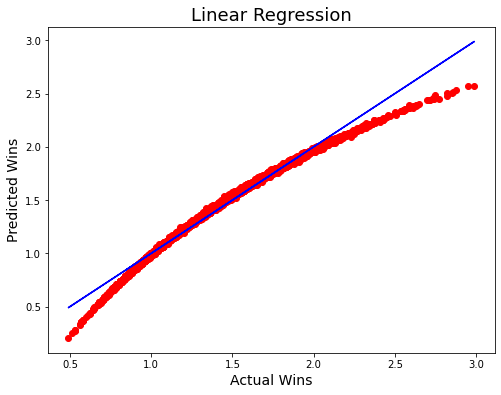

In [77]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Wins',fontsize=14)
plt.ylabel('Predicted Wins',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regularization

### Lasso Regression

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10)),'max_iter':[100,200,500,1000],'normalize':[True,False]}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'max_iter': 100, 'normalize': False, 'random_state': 0}


In [79]:
ls=Lasso(alpha=0.0001,random_state=0,max_iter=100,normalize=False)
ls.fit(x_train,y_train)

Lasso(alpha=0.0001, max_iter=100, random_state=0)

In [80]:
ls_pred=ls.predict(x_test)
lss=r2_score(y_test,ls_pred)
lss

0.9818987794826682

In [81]:
cv_score_Lasso=cross_val_score(ls,x_new,y,cv=4)
print(cv_score_Lasso.mean())

0.943161674311943


### Ridge Regression

In [82]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10)),'max_iter':[100,200,500,1000],'normalize':[True,False]}
Rg=Ridge()
clf=GridSearchCV(Rg,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'max_iter': 100, 'normalize': False, 'random_state': 0}


In [83]:
Rgg=Ridge(alpha=1,random_state=0,max_iter=100,normalize=False)
Rgg.fit(x_train,y_train)

Ridge(alpha=1, max_iter=100, random_state=0)

In [84]:
Rg_pred=Rgg.predict(x_test)
Rgs=r2_score(y_test,Rg_pred)
Rgs

0.9818907752582774

In [85]:
cv_score_ridge=cross_val_score(Rgg,x_new,y,cv=4)
print(cv_score_ridge.mean())

0.9425748637946575


### Ensemble Technique

In [86]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [87]:
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [89]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)


RandomForestRegressor()

In [90]:
rf_pred=rf.predict(x_test)
rfs=r2_score(y_test,rf_pred)
rfs

0.9999990590710508

In [91]:
cv_score_RF=cross_val_score(rf,x_new,y,cv=4)
print(cv_score_RF.mean())

0.9998531864940735


So the best accuracy is given by Random forest regressor so we choose it our final model

### Saving the model in pickel

In [93]:
import pickle
filename='Avocado_regress.pickle'
pickle.dump(rf,open(filename,'wb'))

# Documentation

In [ ]:
Import the csv file then seen the data we found lost's of 0 values in the columns so we delt with that.
we did not replace 0 values in large bags column since it has more than 70% of 0 values.
After that we have seen the column 'Unnamed: 0' which is unnecessary so we removed it from the data set.
Then the vizualization of the categorical and continuous data is done and seen lots of skewness in the continuous data that was removed with the power transform function.
Then encoding is done with the help of label encoder.
Then correlation is checked with the target variable and the columns ['Date','AveragePrice','type','year'] has been removed since they have very less relationship with the target variable.
Then we checked for outliers and found that lots of data are the outliers so we didn't remove them as lots of data will be deleted if we remove outliers.
After scaling the data we checked for multicollinearity and it is found so we removed ['Total Bags','Small Bags'] columns.
After that we trained the model with several algorithms and found Random forest classifier as the best algo for classification problem.
All the same above steps are done for regression problem and found Random forest regressor as the best algo for the regression problem.
The ROC AUC curve is not made since the classification is not binary, there were several classes.
In the last we saved the model.